In [14]:
import tensorflow as tf
from tensorflow.keras import models, datasets, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import layers
from os import listdir
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5C0E-61B9

 Directory of C:\Users\Personal00\Desktop\new desk\Python\deep learning\covid detection

05-10-2023  12:22 PM    <DIR>          .
05-10-2023  12:22 PM    <DIR>          ..
05-10-2023  12:22 PM    <DIR>          .ipynb_checkpoints
05-10-2023  12:22 PM            22,242 covid detection with transfer learning.ipynb
03-10-2023  09:50 PM    <DIR>          covidDetection
               1 File(s)         22,242 bytes
               4 Dir(s)  41,034,514,432 bytes free


In [5]:
data_list_model=listdir('covidDetection/train')
data_list_model

['bacterial_viral', 'COVID']

In [6]:
data_list_model=listdir('covidDetection/test')
data_list_model

['bacterial_viral', 'COVID']

In [7]:
img_size=(200,200)
batch_size=100
no_of_epochs=100
learn_rate=0.0001
no_classes=len(data_list_model)

In [8]:
# train data generator common object
img_data_gen=ImageDataGenerator(featurewise_center=True,
                samplewise_center=False,
                featurewise_std_normalization=True,
                samplewise_std_normalization=False,
                zca_whitening=True,
                rotation_range=50,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.25,
                zoom_range=0.1,
                channel_shift_range=20,
                fill_mode='constant',
                horizontal_flip=True,
                vertical_flip=True,
                rescale=1./255)

C:\Users\Personal00\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [9]:
train_data_set_loc='covidDetection/train'

In [15]:
# generate train batches
train_batches=img_data_gen.flow_from_directory(train_data_set_loc,
                target_size=img_size,
                classes=None,
                class_mode='categorical',
                batch_size=batch_size,
                shuffle=True,
                seed=42, 
                subset='training')

Found 175 images belonging to 2 classes.


In [16]:
test_data_set_loc='covidDetection/test'

In [17]:
# generate test/validation batches
test_batches=img_data_gen.flow_from_directory(test_data_set_loc,
                target_size=img_size,
                classes=None,
                class_mode='categorical',
                batch_size=batch_size,
                shuffle=True,
                seed=42,
                subset='validation')

Found 0 images belonging to 2 classes.


C:\Users\Personal00\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\Personal00\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


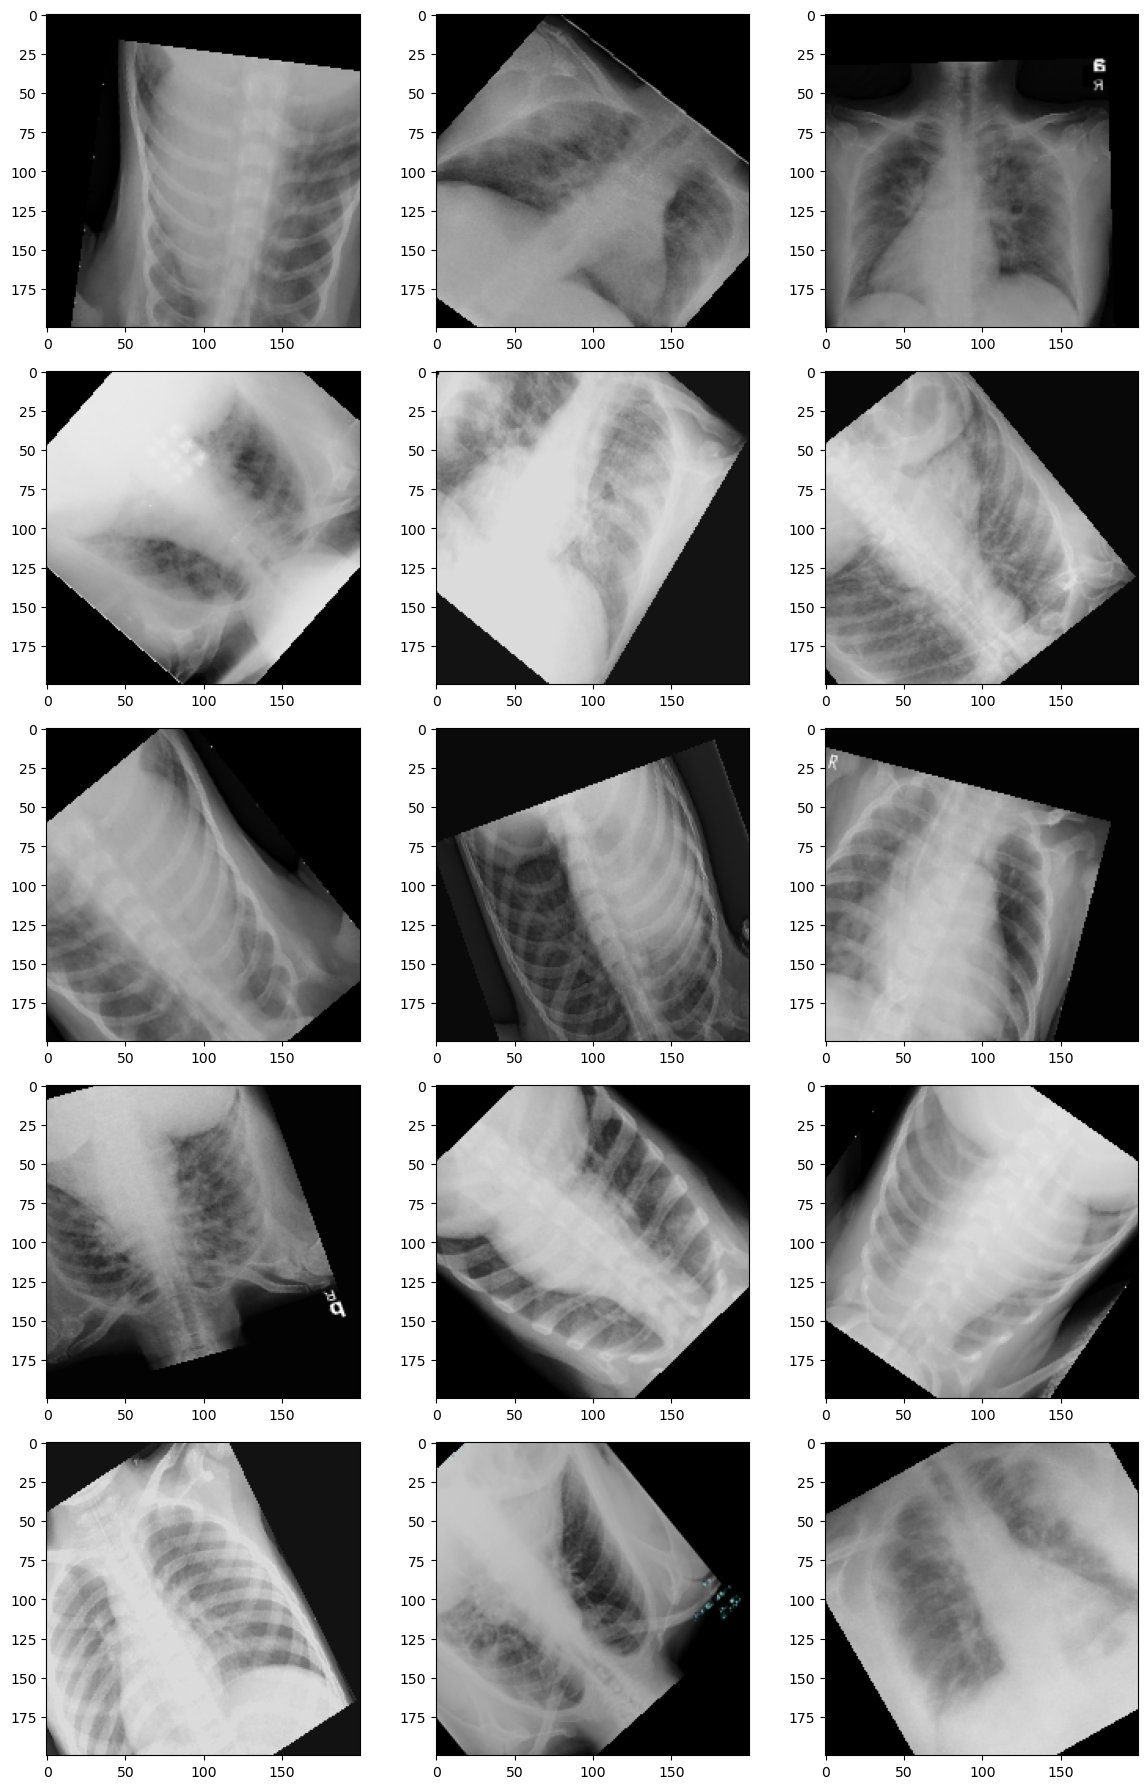

In [18]:
# how training data looks
plt.figure(figsize=(12,18))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_data, y_data in train_batches:
        image=x_data[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [11]:
# import vgg16 model with weights
# include_top layer false beacause dont want to add probability cal layer
vgg16_model= tf.keras.applications.vgg16.VGG16(include_top=False,
                                               weights='imagenet',
                                               input_tensor=None,
                                               input_shape=(200,200,3)
                                              )

In [12]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [13]:
for layer in vgg16_model.layers[:-4]:
    layer.trainable=False

# create covid model with vgg16 pre-trained weights 
covid_mod=tf.keras.Sequential()
covid_mod.add(vgg16_model)
covid_mod.add(layers.Flatten())
covid_mod.add(layers.Dense(64,activation='relu'))
covid_mod.add(layers.Dense(2,activation='softmax'))

In [14]:
covid_mod.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0)

In [15]:
step_size_train=train_batches.n//train_batches.batch_size
step_size_valid=test_batches.n//test_batches.batch_size
print(step_size_train,step_size_valid)


1 0


In [16]:
# to train covid model
covid_mod.fit_generator(train_batches,steps_per_epoch=step_size_train,epochs=5,verbose=True)

C:\Users\Personal00\AppData\Local\Temp\ipykernel_4872\3228596922.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  covid_mod.fit_generator(train_batches,steps_per_epoch=step_size_train,epochs=5,verbose=True)
C:\Users\Personal00\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\Personal00\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
1/1 [==============================] - 33s 33s/step - loss: 0.6804 - accuracy: 0.5200
Epoch 2/5
1/1 [==============================] - 38s 38s/step - loss: 0.8531 - accuracy: 0.5067
Epoch 3/5
1/1 [==============================] - 23s 23s/step - loss: 0.5904 - accuracy: 0.7467
Epoch 4/5
1/1 [==============================] - 24s 24s/step - loss: 0.6797 - accuracy: 0.5200
Epoch 5/5
1/1 [==============================] - 30s 30s/step - loss: 0.5839 - accuracy: 0.7900


In [17]:
# generate train batches
train_batches=img_data_gen.flow_from_directory(train_data_set_loc,
                target_size=img_size,
                classes=None,
                class_mode='categorical',
                batch_size=batch_size,
                shuffle=True,
                seed=42, 
                subset='training')

Found 175 images belonging to 2 classes.


In [18]:
img_data_gen=ImageDataGenerator(rescale=1./255)
train_batch=img_data_gen.flow_from_directory(train_data_set_loc,target_size=img_size,batch_size=1
                                              ,shuffle=False,seed=42)

Found 175 images belonging to 2 classes.


In [19]:
train_batch.reset()
train_result=covid_mod.evaluate_generator(train_batch,steps=len(train_batch),
                                         use_multiprocessing=False,
                                         verbose=1,
                                         workers=1)
print('train_loss',train_result[0],'train_accuracy ',train_result[1])

C:\Users\Personal00\AppData\Local\Temp\ipykernel_4872\777238245.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_result=covid_mod.evaluate_generator(train_batch,steps=len(train_batch),


175/175 [==============================] - 42s 231ms/step - loss: 0.5098 - accuracy: 0.7543
train_loss 0.5097560286521912 train_accuracy  0.7542856931686401


In [21]:
predict_model=covid_mod.predict_generator(train_batch,steps=len(train_batch))
predicted_class=np.argmax(predict_model,axis=1)

C:\Users\Personal00\AppData\Local\Temp\ipykernel_4872\1874635252.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict_model=covid_mod.predict_generator(train_batch,steps=len(train_batch))


In [22]:
print(confusion_matrix(train_batch.classes,predicted_class))

[[ 32  43]
 [  0 100]]


In [23]:
print(classification_report(train_batch.classes,predicted_class))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        75
           1       0.70      1.00      0.82       100

    accuracy                           0.75       175
   macro avg       0.85      0.71      0.71       175
weighted avg       0.83      0.75      0.73       175



In [24]:
test_data_gen=ImageDataGenerator(rescale=1./255)
test_batch=test_data_gen.flow_from_directory(test_data_set_loc,target_size=img_size,batch_size=1
                                              ,shuffle=False,seed=42)

Found 50 images belonging to 2 classes.


In [25]:
test_batch.reset()
test_result=covid_mod.evaluate_generator(test_batch,steps=len(test_batch),
                                         use_multiprocessing=False,
                                         verbose=1,
                                         workers=1)
print('train_loss',test_result[0],'train_accuracy ',test_result[1])

C:\Users\Personal00\AppData\Local\Temp\ipykernel_4872\1445285176.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_result=covid_mod.evaluate_generator(test_batch,steps=len(test_batch),


50/50 [==============================] - 13s 261ms/step - loss: 0.5669 - accuracy: 0.6200
train_loss 0.5669423937797546 train_accuracy  0.6200000047683716


In [26]:
predict_model=covid_mod.predict_generator(test_batch,steps=len(test_batch))
predicted_class=np.argmax(predict_model,axis=1)

C:\Users\Personal00\AppData\Local\Temp\ipykernel_4872\3017666660.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict_model=covid_mod.predict_generator(test_batch,steps=len(test_batch))


In [27]:
print(confusion_matrix(test_batch.classes,predicted_class))


[[ 6 19]
 [ 0 25]]


In [28]:
print(classification_report(test_batch.classes,predicted_class))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.57      1.00      0.72        25

    accuracy                           0.62        50
   macro avg       0.78      0.62      0.56        50
weighted avg       0.78      0.62      0.56        50

